# Index   

### Importing libraries

In [2]:
from platform import python_version

print('python version: %s' % python_version()) # print version

python version: 3.7.12


In [3]:
import os
import json 
import requests
import selenium
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
import base64
import time
import urllib.request


C:\Users\march\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  if __name__ == "__main__":


WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [52]:

DRIVER_PATH = 'c:\\Users\\march\\chromedriver.exe'

SAVE_FOLDER_baseball = 'c:\\Users\\march\\Imágenes\\baseball'

GOOGLE_IMAGES = 'https://www.bing.com/images/search?q=baseball&form=HDRSC2&first=1&tsc=ImageHoverTitle'


driver = webdriver.Chrome(DRIVER_PATH)
driver.get(GOOGLE_IMAGES)


C:\Users\march\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


In [53]:
# Scroll to the end of the page
def scroll_to_end():
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)
    print('scroll done')


In [54]:
counter = 0
for i in range(1,10):     
    scroll_to_end()
    image_elements = driver.find_elements_by_class_name("rg_i Q4LuWd")#[0].text
    print(len(image_elements))
    for image in image_elements: 
        if (image.get_attribute('src') is not None):
            my_image = image.get_attribute('src').split('data:image/jpeg;base64,')
            filename = SAVE_FOLDER_baseball + 'baseball'+str(counter)+'.jpeg'
            if(len(my_image) >1): 
                with open(filename, 'wb') as f: 
                    f.write(base64.b64decode(my_image[1]))
            else: 
                print(image.get_attribute('src'))
                urllib.request.urlretrieve(image.get_attribute('src'), SAVE_FOLDER_baseball + 'baseball'+ str(counter)+'.jpeg')
            counter += 1


scroll done


AttributeError: 'WebDriver' object has no attribute 'find_elements_by_class_name'

# Seleneium 2a manarea

https://medium.com/@wwwanandsuresh/web-scraping-images-from-google-9084545808a2

In [20]:
import selenium
from selenium import webdriver

DRIVER_PATH =  'c:\\Users\\march\\chromedriver.exe'

wd = webdriver.Chrome(executable_path=DRIVER_PATH)
wd.get('https://google.com') 
search_box = wd.find_element_by_css_selector('input.gLFyf') #input box selector
search_box.send_keys('Any query')

C:\Users\march\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


WebDriverException: Message: unknown error: cannot determine loading status
from disconnected: received Inspector.detached event
  (Session info: chrome=104.0.5112.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x002378B3+2193587]
	Ordinal0 [0x001D0681+1771137]
	Ordinal0 [0x000E41A8+803240]
	Ordinal0 [0x000D7E1E+753182]
	Ordinal0 [0x000D7A0F+752143]
	Ordinal0 [0x000D6FAF+749487]
	Ordinal0 [0x000D5E94+745108]
	Ordinal0 [0x000D6498+746648]
	Ordinal0 [0x000E0610+787984]
	Ordinal0 [0x000D781D+751645]
	Ordinal0 [0x000D8450+754768]
	Ordinal0 [0x000D7A2A+752170]
	Ordinal0 [0x000D6FAF+749487]
	Ordinal0 [0x000D5E94+745108]
	Ordinal0 [0x000D636D+746349]
	Ordinal0 [0x000E5974+809332]
	Ordinal0 [0x0013E18D+1171853]
	Ordinal0 [0x0012D7AC+1103788]
	Ordinal0 [0x0013DAE2+1170146]
	Ordinal0 [0x0012D5C6+1103302]
	Ordinal0 [0x001077E0+948192]
	Ordinal0 [0x001086E6+952038]
	GetHandleVerifier [0x004E0CB2+2738370]
	GetHandleVerifier [0x004D21B8+2678216]
	GetHandleVerifier [0x002C17AA+512954]
	GetHandleVerifier [0x002C0856+509030]
	Ordinal0 [0x001D743B+1799227]
	Ordinal0 [0x001DBB68+1817448]
	Ordinal0 [0x001DBC55+1817685]
	Ordinal0 [0x001E5230+1856048]
	BaseThreadInitThunk [0x771FFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77417A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77417A6E+238]
	(No symbol) [0x00000000]


In [15]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [16]:
def persist_image(folder_path:str,file_name:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        folder_path = os.path.join(folder_path,file_name)
        if os.path.exists(folder_path):
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        else:
            os.mkdir(folder_path)
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [ ]:
persist_image(folder_path:str,file_name:str,url:str)

In [21]:
wd = webdriver.Chrome(executable_path=DRIVER_PATH)
queries = ["CORONA-VIRUS","oneplus 8"]  #change your set of querries here
for query in queries:
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,2,wd)
    #images_path = '/Users/anand/Desktop/contri/images'  #enter your desired image path
    images_path = 'ENTER_PATH_TO_IMAGES_FOLDER'
    for i in links:
        persist_image(images_path,query,i)
wd.quit()

C:\Users\march\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


AttributeError: 'WebDriver' object has no attribute 'find_element_by_css_selector'

# 3a manera

In [23]:
!pip install google_images_download

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for google_images_download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14532 sha256=735310bbec406ac9e01175e4613e2492dde2548e472dc1a3342286e740fb4677
  Stored in directory: c:\users\march\appdata\local\pip\cache\wheels\e3\98\42\0d3a76d46cd5a6659afb2f5612d4908ca42d34060973d46727
Successfully built google_images_download


In [ ]:
https://github.com/hardikvasa/google-images-download/blob/master/README.rst

In [24]:
from google_images_download import google_images_download   #importing the library


In [30]:

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"baseball","limit":50,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = baseball
Evaluating...
Starting Download...


Unfortunately all 50 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

({'baseball': []}, 0)


In [ ]:
# web scraping with beautiful soup

In [ ]:
https://w3resource.com/python-exercises/web-scraping/web-scraping-exercise-8.php

In [51]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('https://www.bing.com/images/search?q=baseball&form=HDRSC2&first=1&tsc=ImageHoverTitle')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img', {'src':re.compile('.jpg')})
for image in images: 
    print(image['src']+'\n')

# bing-image-downloader

https://pypi.org/project/bing-image-downloader/

In [56]:
from bing_image_downloader import downloader


In [60]:
downloader.download('baseball match', limit=10,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)


[%] Downloading Images to c:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\dataset\baseball match


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/3LL1K0AW0g4/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://whatistheodds.com/wp-content/uploads/2019/03/MLB.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.freecreatives.com/wp-content/uploads/2016/08/Baseball-Event-Flyer-Template.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.bgsu.edu/content/dam/BGSU/news/2016/10/Baseball.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.sgshopfy.com/wp-content/uploads/2020/04/SmartBaseball2.jpg
[!] Issue getting: https://www.sgshopfy.com/wp-content/uploads/2020/04/SmartBaseball2.jpg
[!] Error:: <urlopen error [WinError 10060] Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecua

# Image Validation

In [63]:
import matplotlib.pyplot as plt #
import matplotlib.image as img #to open images


def check_image(image_path, use_case):
    '''Fuction to validate image as aimed for training. It asks user whether the images is valid to be used as traingin for the required
            INPUT: 2 strings, the first one is the complete path to the image, 2nd one is the use case.
            OUTPUT: a string saying the calidation code, options: 'valid' / 'not valid' / 'doubtful
            CHECKINGS'
            '''
    classification = 'not valid'
    if cv2.haveImageReader(img_path): #check if opencv can read the image

        #  OPEN IMAGE
        from mpl_toolkits.axes_grid1 import ImageGrid
        fig = plt.figure(figsize=(20., 80.))
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                        nrows_ncols=(1, 3),  # creates 1x3 grid of axes
                        axes_pad=0.1,  # pad between axes in inch.
                        )
        image = img.imread(image_path)
        plt.imshow(image)
        plt.show()


        for ax, im in zip(grid, [img_sub1, img_sub3, img_sub2]):
            # Iterating over the grid returns the Axes.    
            ax.set_title('Subject')
            ax.imshow(im)

        plt.show()

        correct=False
        while correct==False:
            resposta = input (f'The image is useful to {use_case} ?\n Options: 1 = VALID / 2 = NOT VALID / 3 = VALID')
            if resposta in [1,2,3]
                correct=True
            else:
                print ('Incorrect answer!! \n Please, choose a choice within the list: 1 / 2 / 3 !!!\n')
        
        if resposta ==1:
            classification = 'valid' 
        elif resposta ==1:
            classification = 'valid' 
        

            
        
            classification = 'not valid' 
            classification = 'doubtful'



        return classification
    else:
        print ('It was not able to open the image. Possible causes: incorrect route, synthaxis, missing permissions,...')
        return classification


    correct=False
    while correct=False:
        resposta = input (f'The image is useful to {use_case} ?\n Options: 1 = VALID / 2 = NOT VALID / 3 = UNKNOWN')
        if resposta in [1,2,3]:
            correct=True
        else:
            print ('Incorrect answer!! \n Please, choose a choice within the list: 1 / 2 / 3 ')
    classification ='unknown'
    if resposta ==1:
        classification = 'valid' 
        
    
        classification = 'not valid' 
        classification = 'doubtful'



    return classification

SyntaxError: invalid syntax (605205561.py, line 36)

In [65]:
import matplotlib.pyplot as plt #
import matplotlib.image as img #to open images

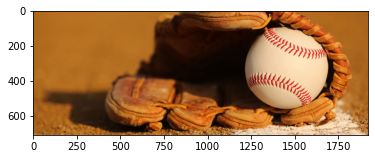

In [66]:
image = img.imread('C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\Image_sports_classification\\dataset\\baseball match\\Image_4.jpg')
plt.imshow(image)
plt.show()